In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("D:\PYTHON\DS COURSE MATERIAL\DATA\Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Train Test Split

In [4]:
X = df.drop("sales",axis=1)
y= df["sales"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

### Scaling Features

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Interaction Features

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
from sklearn.linear_model import LinearRegression

In [19]:
rmse_train_vals=[]
rmse_test_vals=[]
degs=[]

for deg in range(1,10):
    degs.append(deg)
    
    poly_feat = PolynomialFeatures(degree=deg,include_bias=False)
    X_poly_train = poly_feat.fit_transform(X_train)
    X_poly_test = poly_feat.fit_transform(X_test)
    
    model = LinearRegression()
    
    model.fit(X_poly_train,y_train) 
    train_res = model.predict(X_poly_train)
    test_res= model.predict(X_poly_test)
   
    
    rmse_train_vals.append(np.sqrt(mean_squared_error(y_train,train_res)))
    rmse_test_vals.append(np.sqrt(mean_squared_error(y_test,test_res)))
    
    

In [21]:
di_poly ={"degree":degs,
          "train_rmse":rmse_train_vals,
          "test_rmse":rmse_test_vals,}
poly_df = pd.DataFrame(di_poly)
poly_df

,degree,train_rmse,test_rmse
0,1,1.734594,1.516152
1,2,0.587957,0.664643
2,3,0.433934,0.580329
3,4,0.351708,0.507774
4,5,0.250934,2.575825
5,6,0.199407,4.490840
6,7,5.421422,1381.404418
7,8,0.141952,4449.598881
8,9,0.166528,95891.239706


[]

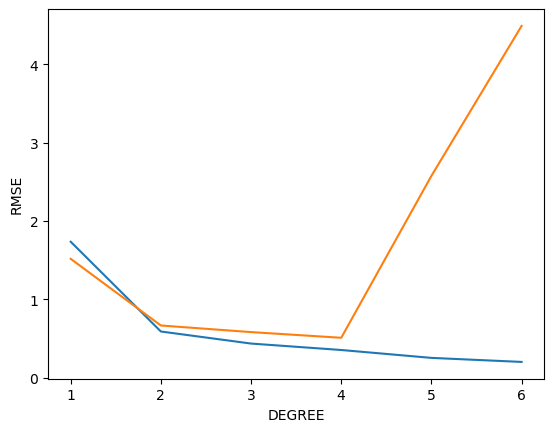

In [32]:
i=6
sns.lineplot(x=degs[0:i],y=rmse_train_vals[0:i])
sns.lineplot(x=degs[0:i],y=rmse_test_vals[0:i])
plt.xlabel("DEGREE")
plt.ylabel("RMSE")
plt.plot()

### THe best degree value is observed to be 4

In [33]:

poly_feat = PolynomialFeatures(degree=4,include_bias=False)
X_poly_train = poly_feat.fit_transform(scaled_X_train)
X_poly_test = poly_feat.fit_transform(scaled_X_test)


In [34]:

model = LinearRegression()

In [35]:
model.fit(X_poly_train,y_train) 

LinearRegression()

In [36]:
train_res = model.predict(X_poly_train)
test_res= model.predict(X_poly_test)

RMSE

In [37]:
np.sqrt(mean_squared_error(y_train,train_res))

0.35170836883993506

In [38]:
np.sqrt(mean_squared_error(y_test,test_res))

0.5077742639151777

Ridge Model